# PROJET 3: Anticipez les besoins en consommation électrique de bâtiments

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [CONTEXTE DU PROJET](#1)<a class="anchor" id="sommaire"></a>
## [LES DONNEES DU PROJET](#2)<a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#4)<a class="anchor" id="sommaire"></a>
## [MISSION 1: NETTOYAGE DES DONNEES](#5)<a class="anchor" id="sommaire"></a>

## [CONTEXTE DU PROJET](#sommaire)<a class="anchor" id="1"></a>

Analyse et prédiction sur la base de données de la ville de seattle de 2015 et 2016

## [LES DONNEES DU PROJET](#sommaire)<a class="anchor" id="2"></a>

https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking?select=2015-building-energy-benchmarking.csv

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="4"></a>

In [80]:
data_test=pd.read_csv('2015-building-energy-benchmarking.csv',sep=',', error_bad_lines=True,nrows=50000,low_memory=False)
df1=pd.DataFrame(data_test)

In [81]:
data_test=pd.read_csv('2016-building-energy-benchmarking.csv',sep=',', error_bad_lines=True,nrows=50000,low_memory=False)
df=pd.DataFrame(data_test)

##### Aperçu des dataframes

In [82]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [83]:
df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,...,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,...,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,...,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122...",4,NORTHEAST,1981,...,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


###### Vérification clé primaire

In [84]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [85]:
df1.nunique()

OSEBuildingID                                                    3340
DataYear                                                            1
BuildingType                                                        7
PrimaryPropertyType                                                27
PropertyName                                                     3287
TaxParcelIdentificationNumber                                    3245
Location                                                         3298
CouncilDistrictCode                                                 7
Neighborhood                                                       13
YearBuilt                                                         113
NumberofBuildings                                                  10
NumberofFloors                                                     50
PropertyGFATotal                                                 3150
PropertyGFAParking                                                908
PropertyGFABuilding(

Il y a autant de OSEBuildingID que d'échantillons dans chaque dataframe

Vérifions que chaque clé OSEBuildingID qui est contenue dans les deux dataframes correspond au même objet en comparant par exemple le YearBuilt

In [86]:
dftest=df[['OSEBuildingID','YearBuilt']]
print(dftest)
df_iter=[]
df_iter2=[]
for i in dftest['OSEBuildingID']:
    dftestiter1=df1[df1['OSEBuildingID']==i]
    dftestiter2=df[df['OSEBuildingID']==i]
    if not dftestiter1.empty:
        df_iter.append(dftestiter1[['OSEBuildingID','YearBuilt']])
        df_iter2.append(dftestiter2[['OSEBuildingID','YearBuilt']])
        
dftest2=pd.concat(df_iter,ignore_index=True)
dftest1=pd.concat(df_iter2,ignore_index=True)
print(dftest2)
print(dftest1)

      OSEBuildingID  YearBuilt
0                 1       1927
1                 2       1996
2                 3       1969
3                 5       1926
4                 8       1980
...             ...        ...
3371          50222       1990
3372          50223       2004
3373          50224       1974
3374          50225       1989
3375          50226       1938

[3376 rows x 2 columns]
      OSEBuildingID  YearBuilt
0                 1       1927
1                 2       1996
2                 3       1969
3                 5       1926
4                 8       1980
...             ...        ...
3279          50049       2000
3280          50055       2014
3281          50057       2015
3282          50058       1981
3283          50059       1981

[3284 rows x 2 columns]
      OSEBuildingID  YearBuilt
0                 1       1927
1                 2       1996
2                 3       1969
3                 5       1926
4                 8       1980
...             ... 

In [87]:
dftest1.equals(dftest2)

True

##### Vérification et changement des variables différentes/doublons

PrimaryPropertyType

In [88]:
for i in range(len(df1)):
    if df1.loc[i,'PrimaryPropertyType']=='Warehouse':
        df1.loc[i,'PrimaryPropertyType']='Non-Refrigerated Warehouse'
    if df1.loc[i,'PrimaryPropertyType']=='Distribution Center\n':
        df1.loc[i,'PrimaryPropertyType']='Distribution Center'
    if df1.loc[i,'PrimaryPropertyType']=='Supermarket/Grocery Store':
        df1.loc[i,'PrimaryPropertyType']='Supermarket / Grocery Store'
    if df1.loc[i,'PrimaryPropertyType']=='Self-Storage Facility\n':
        df1.loc[i,'PrimaryPropertyType']='Self-Storage Facility'
    if df1.loc[i,'PrimaryPropertyType']=='Restaurant\n':
        df1.loc[i,'PrimaryPropertyType']='Restaurant'
    if df1.loc[i,'PrimaryPropertyType']=='Non-Refrigerated Warehouse':
        df1.loc[i,'PrimaryPropertyType']='Warehouse'
    if df1.loc[i,'PrimaryPropertyType']=='SPS-District K-12':
        df1.loc[i,'PrimaryPropertyType']='K-12 School'
for i in range(len(df1)):
    if df.loc[i,'PrimaryPropertyType']=='SPS-District K-12':
        df.loc[i,'PrimaryPropertyType']='K-12 School'

In [89]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Restaurant                      12
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Office                           3
Name: PrimaryPropertyType, dtype: int64

#### Ajout des valeurs de 2015 à 2016

Nous allons renommner colonnes préalablement à l'ajout des valeurs de 2015 à 2016

In [90]:
df1=df1.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity','Comment':'Comments','Zip Codes':'ZipCode'})

Ajoutons les données manquantes

Nous allons d'abord regarder les données présentes en 2015 et 2016

In [91]:
for i in df1.index:
    id=df1.loc[i,'OSEBuildingID']
    if df[df['OSEBuildingID']==id].empty:
        df=pd.concat([df,df1[df1['OSEBuildingID']==id].reset_index()],axis=0)
df=df.drop(['index'],axis=1)

In [92]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Location,OtherFuelUse(kBtu),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,Compliant,NaN,286.43,4.67,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,Compliant,NaN,505.01,2.88,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,27985,2015,Multifamily LR (1-4),Low-Rise Multifamily,LICTON SPRINGS APT,NaN,NaN,NaN,18377.0,4310701340,...,Compliant,NaN,4.88,0.05,"{'latitude': '47.69838396', 'longitude': '-122...",0.0,NaN,46.0,NaN,34.0
0,28045,2015,Multifamily MR (5-9),Mid-Rise Multifamily,TRESSA APARTMENTS BUILDING 1,NaN,NaN,NaN,19582.0,4340200000,...,Compliant,NaN,118.20,0.23,"{'latitude': '47.7317276', 'longitude': '-122....",0.0,116.0,6.0,1.0,33.0
0,28064,2015,Multifamily LR (1-4),Low-Rise Multifamily,THE VILLAGE WEST APTS,NaN,NaN,NaN,18385.0,4365700545,...,Compliant,NaN,8.72,0.08,"{'latitude': '47.52141906', 'longitude': '-122...",0.0,NaN,54.0,NaN,14.0
0,49769,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Test MF High Use (ID 49769),NaN,NaN,NaN,18377.0,NaN,...,Compliant,NaN,51.55,1.17,"{'latitude': '47.6590538024902', 'longitude': ...",0.0,NaN,20.0,NaN,2.0


Nous avons 56 nouvelles entrées et quelques nouvelles colonnes dont Location.

##### Transformation de la data location 

Nous avons une string complexe en 2016 qui correspond aux entrées 'Latitude','Longitude','Adress','City','state' et 'Zip Codes'

In [93]:
import re
def listelocation(a):
    list=[]
    string=str(a)
    pattern=', '
    result=re.split(pattern,string)
    list.append(result[0].lstrip('{\'latitude\': ').rstrip('\''))
    list.append(result[1].lstrip('\'longitude\': ').rstrip('\''))
    list.append(result[2].lstrip('\'human_address\': \'{"address": ').rstrip('\""'))
    list.append(result[3].lstrip('\"city": "').rstrip('\""'))
    list.append(result[4].lstrip('\"state": "').rstrip('\""'))
    list.append(result[5].lstrip('\"zip": "').rstrip('\"}\''))
    return list

In [94]:
df['Location']

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                           ...                        
0    {'latitude': '47.69838396', 'longitude': '-122...
0    {'latitude': '47.7317276', 'longitude': '-122....
0    {'latitude': '47.52141906', 'longitude': '-122...
0    {'latitude': '47.6590538024902', 'longitude': ...
0    {'latitude': '47.62811223', 'longitude': '-122...
Name: Location, Length: 3432, dtype: object

In [95]:
df=df.reset_index()
df=df.drop(['index'],axis=1)

In [96]:
df=df.fillna({'Location':0})
for i in range(len(df)):    
    if df.loc[i,'Location']!=0:
        liste=listelocation(df.loc[i,'Location'])
        df.loc[i,'Latitude']=liste[0]
        df.loc[i,'Longitude']=liste[1]
        df.loc[i,'Address']=liste[2]
        df.loc[i,'City']=liste[3]
        df.loc[i,'State']=liste[4]
        df.loc[i,'ZipCode']=liste[5]

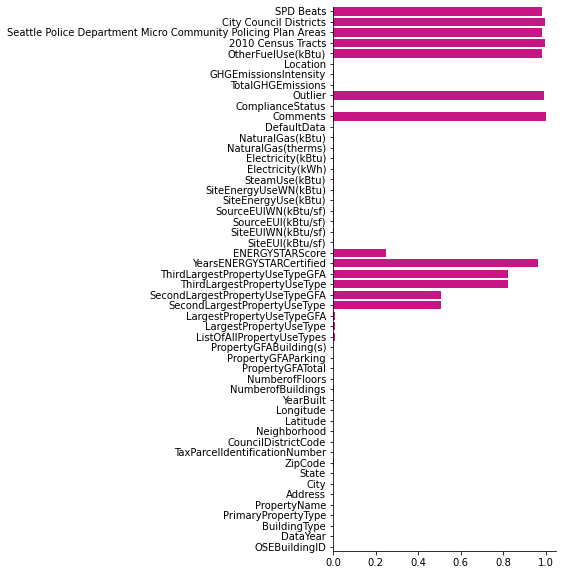

In [97]:
# Proportion de valeurs manquantes par colonne
null_counts = df.isnull().mean(axis=0)

# barplot des valeurs manquantes par colonne
fig = plt.figure(figsize=(4,10))
plt.barh(np.arange(len(null_counts)),null_counts, color="mediumvioletred")
plt.yticks(np.arange(len(null_counts)),null_counts.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)

##### Vérification et changement des variables others dans PrimaryPropertyType

PrimaryPropertyType

In [98]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           1009
Mid-Rise Multifamily            568
Small- and Mid-Sized Office     300
Other                           263
Warehouse                       189
Large Office                    176
K-12 School                     141
Mixed Use Property              134
High-Rise Multifamily           105
Retail Store                     94
Hotel                            77
Worship Facility                 72
Distribution Center              53
Senior Care Community            45
Medical Office                   42
Supermarket / Grocery Store      40
Self-Storage Facility            28
University                       25
Residence Hall                   23
Restaurant                       13
Refrigerated Warehouse           12
Laboratory                       10
Hospital                         10
Office                            3
Name: PrimaryPropertyType, dtype: int64

In [99]:
for i in df.index:
    if df.loc[i,'LargestPropertyUseType']=='Laboratory':
        df.loc[i,'PrimaryPropertyType']='Laboratory'
    if df.loc[i,'LargestPropertyUseType']=='Retail Store':
        df.loc[i,'PrimaryPropertyType']='Retail Store'
    if df.loc[i,'PrimaryPropertyType']=='Office':
        df.loc[i,'PrimaryPropertyType']='Small- and Mid-Sized Office'
    if df.loc[i,'LargestPropertyUseType']=='Parking':
        df.loc[i,'PrimaryPropertyType']='Parking'
        df.loc[i,'PropertyGFAParking']=df.loc[i,'LargestPropertyUseTypeGFA']      
    if df.loc[i,'LargestPropertyUseType']=='Manufacturing/Industrial Plant':
        df.loc[i,'PrimaryPropertyType']='Manufacturing/Industrial Plant'
    if df.loc[i,'LargestPropertyUseType']=='Other - Recreation':
        if df.loc[i,'PropertyName'].endswith('CC'):
            df.loc[i,'PrimaryPropertyType']='Community Center'
        if df.loc[i,'PropertyName'].endswith('Community Center'):
            df.loc[i,'PrimaryPropertyType']='Community Center'
        if df.loc[i,'PropertyName'].endswith('Pool'):
            df.loc[i,'PrimaryPropertyType']='Pool'
    if df.loc[i,'LargestPropertyUseType']=='Other - Entertainment/Public Assembly':
        if df.loc[i,'PropertyName'].endswith('Museum'):
            df.loc[i,'PrimaryPropertyType']='Museum'
        if df.loc[i,'PropertyName'].endswith('Theater'):
            df.loc[i,'PrimaryPropertyType']='Theater'
        if df.loc[i,'PropertyName'].endswith('theatre bldg'):
            df.loc[i,'PrimaryPropertyType']='Theater'
        if df.loc[i,'PropertyName'].endswith('Community Center'):
            df.loc[i,'PrimaryPropertyType']='Community Center'
        if df.loc[i,'PropertyName'].endswith('Cultural Center'):
            df.loc[i,'PrimaryPropertyType']='Museum'
    if df.loc[i,'PrimaryPropertyType']=='Other/Specialty Hospital':
        df.loc[i,'PrimaryPropertyType']='Hospital'
    if df.loc[i,'LargestPropertyUseType']=='Museum':
        df.loc[i,'PrimaryPropertyType']='Museum'
    if df.loc[i,'PrimaryPropertyType']=='Urgent Care/Clinic/Other Outpatient':
        df.loc[i,'PrimaryPropertyType']='Hospital'
    if df.loc[i,'LargestPropertyUseType']=='Performing Arts':
        df.loc[i,'PrimaryPropertyType']='Theater'
    if df.loc[i,'PrimaryPropertyType']=='Other - Education':
        df.loc[i,'PrimaryPropertyType']='Small- and Mid-Sized Office'
    if df.loc[i,'LargestPropertyUseType']=='Adult Education':
        df.loc[i,'PrimaryPropertyType']='Small- and Mid-Sized Office'
    if df.loc[i,'PrimaryPropertyType']=='Data Center':
        df.loc[i,'PrimaryPropertyType']='Manufacturing/Industrial Plant'
    if df.loc[i,'LargestPropertyUseType']=='Financial Office':
        df.loc[i,'PrimaryPropertyType']='Small- and Mid-Sized Office'
    if df.loc[i,'PrimaryPropertyType']=='Library':
        df.loc[i,'PrimaryPropertyType']='Museum'
    if df.loc[i,'LargestPropertyUseType']=='Strip Mall':
        df.loc[i,'PrimaryPropertyType']='Retail Store'
    if df.loc[i,'PrimaryPropertyType']=='Bank Branch':
        df.loc[i,'PrimaryPropertyType']='Small- and Mid-Sized Office'
    if df.loc[i,'LargestPropertyUseType']=='Other - Mall':
        df.loc[i,'PrimaryPropertyType']='Retail Store'
    if df.loc[i,'PrimaryPropertyType']=='Social/Meeting Hall':
        df.loc[i,'PrimaryPropertyType']='Community Center'
    if df.loc[i,'LargestPropertyUseType']=='Outpatient Rehabilitation/Physical Therapy':
        df.loc[i,'PrimaryPropertyType']='Medical Office'
for i in df.index:
    if df.loc[i,'BuildingType']=='Nonresidential WA':
        df.loc[i,'BuildingType']='NonResidential'

In [100]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily              1009
Mid-Rise Multifamily               568
Small- and Mid-Sized Office        309
Other                              197
Warehouse                          189
Large Office                       176
K-12 School                        141
Retail Store                       113
High-Rise Multifamily              105
Mixed Use Property                 100
Hotel                               77
Worship Facility                    72
Distribution Center                 53
Senior Care Community               45
Medical Office                      43
Supermarket / Grocery Store         40
Parking                             32
Self-Storage Facility               28
University                          25
Residence Hall                      23
Laboratory                          13
Restaurant                          13
Refrigerated Warehouse              12
Community Center                    11
Hospital                            10
Museum                   

##### Vérification et changement des variables Parking et ParkingGFA

In [101]:
for i in df.index:
    if df.loc[i,'SecondLargestPropertyUseType']=='Parking':
        df.loc[i,'PropertyGFAParking']=df.loc[i,'SecondLargestPropertyUseTypeGFA']
    if df.loc[i,'ThirdLargestPropertyUseType']=='Parking':
        df.loc[i,'PropertyGFAParking']=df.loc[i,'ThirdLargestPropertyUseTypeGFA']

##### Vérification et changement des variables GFA Total et ParkingGFA et BuildingGFA

In [102]:
for i in df.index:
    df.loc[i,'PropertyGFATotal']=df.loc[i,'PropertyGFAParking']+df.loc[i,'PropertyGFABuilding(s)']
    

##### Vérification et changement des variables YearBuilt, Number of buildings, number of floors Neighborhood CouncilDistrictCode

In [103]:
df['YearBuilt'].isna().sum()

0

In [104]:
df['NumberofBuildings'].isna().sum()

8

In [105]:
df['NumberofFloors'].isna().sum()

0

In [106]:
df=df.fillna({'NumberofBuildings':1})

In [107]:
df['CouncilDistrictCode'].isna().sum()

0

In [108]:
df['Neighborhood'].isna().sum()

0

In [109]:
df=df.fillna({'LargestPropertyUseTypeGFA':0})
df=df.fillna({'ThirdLargestPropertyUseTypeGFA':0})
df=df.fillna({'SecondLargestPropertyUseTypeGFA':0})

##### Vérification et changement des variables liées à l'énergie

Elimination des non-compliants

In [110]:
len(df)

3432

In [111]:
df=df[df['ComplianceStatus']=='Compliant']

In [112]:
len(df)

3267

In [113]:
df1=df[df['ComplianceStatus']=='Error - Correct Default Data']

In [114]:
df['ComplianceStatus'].value_counts()

Compliant    3267
Name: ComplianceStatus, dtype: int64

In [115]:
df['OtherFuelUse(kBtu)'].isna().sum()

3212

In [116]:
df=df.fillna({'OtherFuelUse(kBtu)':0})

In [117]:
df['OtherFuelUse(kBtu)'].isna().sum()

0

Elimination des outliers

In [118]:
df['Outlier'].value_counts()

Low Outlier    3
Name: Outlier, dtype: int64

In [119]:
df=df[df['Outlier']!='Low Outlier']
df=df[df['Outlier']!='Low outlier']

In [120]:
len(df)

3264

Ajout d'une colonne error pour vérifier que l'ensemble des values somme pour l'énergie totale avec un intervalle de 1%:

In [121]:
df=df.assign(A=0)
df=df.rename(columns={'A':'ErrorfuelUse'})

In [122]:
df['ErrorfuelUse']

0       0
1       0
2       0
3       0
4       0
       ..
3427    0
3428    0
3429    0
3430    0
3431    0
Name: ErrorfuelUse, Length: 3264, dtype: int64

In [123]:
for i in df.index:    
    df.loc[i,'ErrorfuelUse']=np.abs((df.loc[i,'SiteEnergyUse(kBtu)']-(df.loc[i,'SteamUse(kBtu)'])-(df.loc[i,'Electricity(kBtu)'])-(df.loc[i,'OtherFuelUse(kBtu)'])-(df.loc[i,'NaturalGas(kBtu)']))/df.loc[i,'SiteEnergyUse(kBtu)'])

In [124]:
df=df[df['ErrorfuelUse']<0.01]

In [125]:
len(df)

3223

##### Suppression des colonnes inutiles

In [126]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [127]:
colonnesinutiles=['CouncilDistrictCode','City', 'State','TaxParcelIdentificationNumber','ListOfAllPropertyUseTypes',
       'LargestPropertyUseType',
       'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified','Comments','2010 Census Tracts',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'City Council Districts', 'SPD Beats', 'ErrorfuelUse','Location','DefaultData', 'ComplianceStatus','Outlier']

In [128]:
df=df.drop(colonnesinutiles,axis=1)

Export fichier

In [129]:
df.to_csv("DatasetSeattle.csv",index=False)